In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib nbagg

df = pd.read_csv('/home/cesare/Downloads/all_stocks_5yr.csv', index_col='date', parse_dates=True)
#df = pd.read_csv('/home/cesare/Downloads/all_stocks_5yr.csv', parse_dates=True)
df.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


<IPython.core.display.Javascript object>


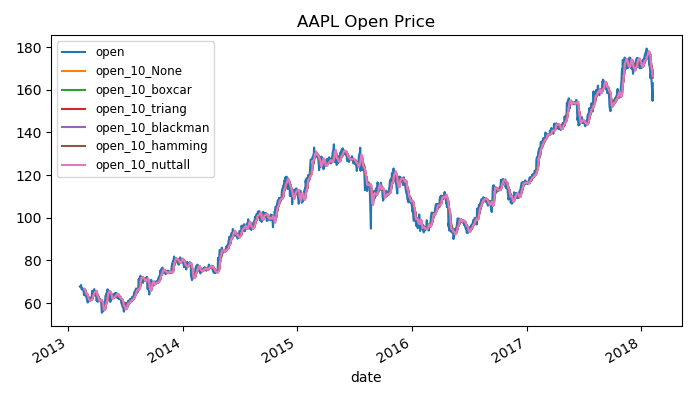

In [6]:
# create a new dataframe with just the apple data
df_aapl = df[df.Name == 'AAPL']

#window length and types
win_len = 10
win_type = [None, 'boxcar', 'triang', 'blackman', 'hamming', 'nuttall']

# plot the raw Open data
ax = df_aapl['open'].plot(figsize=(7, 4), title='AAPL Open Price')

# loop over the window types
for win in win_type:
    df_aapl_roll = df_aapl.rolling(win_len, win_type=win).mean()
    
    # rename the columns so we can see them in the legend
    df_aapl_roll.columns = [
        '{}_{}_{}'.format(col, win_len, win) for col in df_aapl_roll.columns
    ]
    df_aapl_roll['open_{}_{}'.format(win_len, win)].plot()

# show everything
ax.legend(fontsize=8.5)
plt.tight_layout()
plt.show()